# **Importing the Dataset :**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = '/content/drive/My Drive/spam.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install chardet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import chardet
with open(data, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [ ]:
df=pd.read_csv(data,encoding='Windows-1252')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.describe().transpose()

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df=df.rename({'v1':'Class','v2':'SMS'},axis=1)
df

,Class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='Class', ylabel='count'>

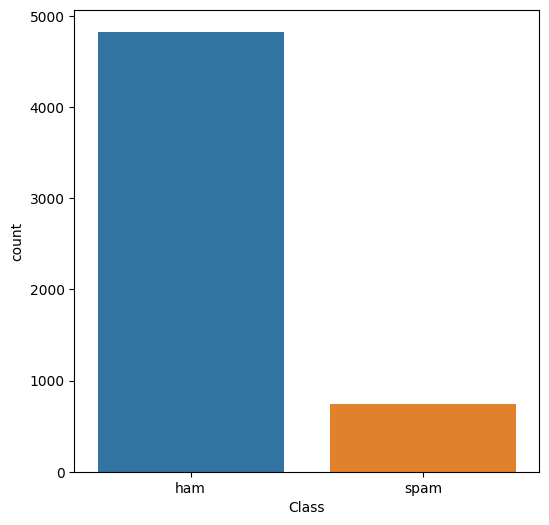

In [ ]:
plt.figure(figsize=(6,6))
x= df.Class.value_counts()
sns.countplot(x= "Class",data= df)

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
eng = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# *Core logic for cleaning Data*

In [ ]:
def fix_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in eng)
    return text

In [ ]:
df['Cleaned_text'] = df['SMS'].apply(fix_text)
df.head()

,Class,SMS,Cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [ ]:
#df=df.drop(['SMS'],axis=1)
#df

In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.shape


(5169, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Class']=encoder.fit_transform(df['Class'])
df
#ham=0 and spam=1 form data

<ipython-input-138-433f56baa6e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class']=encoder.fit_transform(df['Class'])


,Class,SMS,Cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u 750 pound prize 2...
5568,0,Will Ì_ b going to esplanade fr home?,b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,0,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


Testing Reference data :

In [ ]:
#df['Characters_Count'] = df['SMS'].apply(len)
#df

In [ ]:
"""
import spacy
n = spacy.load("en_core_web_sm")
def nsize(x):
    word=n(x)
    return len(word)

df['Words_count']=df['SMS'].apply(nsize)
df
"""

'\nimport spacy\nn = spacy.load("en_core_web_sm")\ndef nsize(x):\n    word=n(x)\n    return len(word)\n\ndf[\'Words_count\']=df[\'SMS\'].apply(nsize)\ndf\n'

Final Data Required :

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
spam_corpus= []
for msg in df[df['Class']== 1]['Cleaned_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
print(spam_corpus)

['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply', '08452810075over18', 'freemsg', 'hey', 'darling', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', '1', '50', 'rcv', 'winner', 'valued', 'network', 'customer', 'selected', 'receivea', '900', 'prize', 'reward', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '12', 'hours', 'mobile', '11', 'months', 'u', 'r', 'entitled', 'update', 'latest', 'colour', 'mobiles', 'camera', 'free', 'call', 'mobile', 'update', 'co', 'free', '08002986030', 'six', 'chances', 'win', 'cash', '100', '20', '000', 'pounds', 'txt', 'csh11', 'send', '87575', 'cost', '150p', 'day', '6days', '16', 'tsandcs', 'apply', 'reply', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', '100', '000', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'www', 'd

# **Model Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
tf= TfidfVectorizer(max_features=3000)
X = tf.fit_transform(df['Cleaned_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['Class'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
#Gaussian Naive Bayes algorithm
from sklearn.metrics import classification_report
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_test,y_pred_gnb,target_names=['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.98      0.88      0.93       903
        Spam       0.52      0.88      0.65       131

    accuracy                           0.88      1034
   macro avg       0.75      0.88      0.79      1034
weighted avg       0.92      0.88      0.89      1034



In [ ]:
#Multinomial Naive Bayes algorithm
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(classification_report(y_test,y_pred_mnb,target_names=['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       903
        Spam       0.99      0.83      0.90       131

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [ ]:
#Bernoulli naive Bayes algorithm
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(classification_report(y_test,y_pred_bnb,target_names=['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       903
        Spam       0.99      0.92      0.95       131

    accuracy                           0.99      1034
   macro avg       0.99      0.96      0.97      1034
weighted avg       0.99      0.99      0.99      1034



## **Choosing/Testing Best Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'GBDT':gbdt,
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For ",name,":")
    print("Accuracy = ",current_accuracy)
    print("Precision = ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC :
Accuracy =  0.9738878143133463
Precision =  0.9482758620689655
For  KN :
Accuracy =  0.9052224371373307
Precision =  1.0
For  NB :
Accuracy =  0.9777562862669246
Precision =  0.990909090909091
For  DT :
Accuracy =  0.9400386847195358
Precision =  0.822429906542056
For  LR :
Accuracy =  0.9526112185686654
Precision =  0.9183673469387755
For  RF :
Accuracy =  0.9738878143133463
Precision =  0.9642857142857143
For  GBDT :
Accuracy =  0.965183752417795
Precision =  0.9439252336448598


## **Assessing top 2 Models**

In [ ]:
mnb = MultinomialNB()
bnb= BernoulliNB()
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('mnb',mnb),('bnb',bnb)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()), ('bnb', BernoulliNB())],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9874274661508704
Precision 0.9916666666666667
